In [1]:
from manim import *
import random
import numpy as np
import matplotlib.pyplot as plt

config.media_width = "75%"
config.verbosity = "WARNING"

## Simulation

In [2]:
def get_rw_p(type = '2D', max_s = 5000, N = 10000):
    if type == '2D':
        choises = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
        start = np.array([0, 0])
    elif type == '3D':
        choises = np.array([[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]])
        start = np.array([0, 0, 0])
    elif type == '1D':
        choises = np.array(1 ,-1)
        start = 0
    else:
        raise ValueError("type must be '1D', '2D' or '3D'")
    
    is_back = np.zeros((N ,max_s))
    pos = np.tile(start, (N, 1))
    
    for i in range(max_s):
        step = np.random.choice(len(choises), N, replace = True)
        pos += choises[step]
        is_back[:, i][np.where(np.all(pos == 0 , axis =1))] = 1 
    
    return is_back

def get_rw_pos(type = '2D', max_s = 5000, N = 10000):
    if type == '2D':
        choises = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
        start = np.array([0, 0])
    elif type == '3D':
        choises = np.array([[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]])
        start = np.array([0, 0, 0])
    elif type == '1D':
        choises = np.array([[1] ,[-1]])
        start = 0
    else:
        raise ValueError("type must be '1D', '2D' or '3D'")
    
    pos = np.tile(start, (N, max_s,1))
    origin = start    
    for i in range(max_s):
        step = np.random.choice(len(choises), N, replace = True)
        next_pos = origin+choises[step]
        origin = next_pos   
        pos[:, i] += next_pos
    return pos  

         
def plot_rw_p(typed = '2D'):
    max_s = 5000
    N = 10000
    is_black = get_rw_p(typed, max_s, N)
    p = np.sum(is_black, axis = 0) / N

    plt.plot(p[1::2], linestyle='-') 
    plt.xlabel('even steps $s$')                  
    plt.ylabel('$p(s)$')                          
    plt.title('probability $p(s)$ of return to origin in {} random walk'.format(typed))
    plt.grid(True)
    plt.savefig('rw_p_{}.pdf'.format(typed), bbox_inches='tight',pad_inches = 0)
    
    
def plot_rw_pall(typed = '2D'):
    max_s = 5000
    N = 10000
    is_black = get_rw_p(typed, max_s, N)
    p_all = np.where(np.cumsum(is_black, axis = 1)>=1, 1, 0)
    p = np.sum(p_all, axis = 0) / N
    plt.plot(p, linestyle='-') 
    plt.xlabel('steps $s$')                  
    plt.ylabel('$pa(s)$')                          
    plt.title('Eventual return $pa(s)$ of return to origin in {} random walk'.format(typed))  
    plt.grid(True)
    plt.savefig('rw_pall_{}.pdf'.format(typed), bbox_inches='tight',pad_inches = 0)

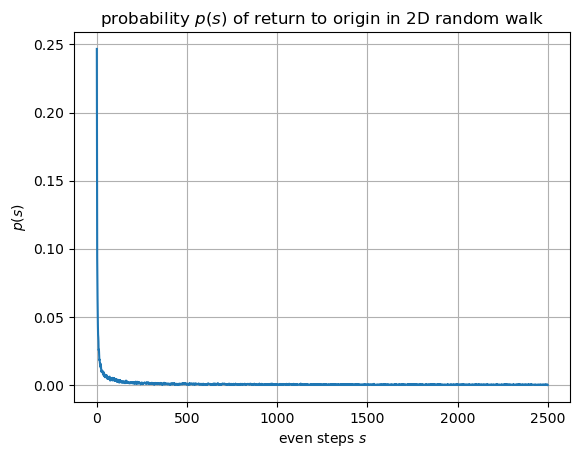

In [3]:
plot_rw_p('2D')

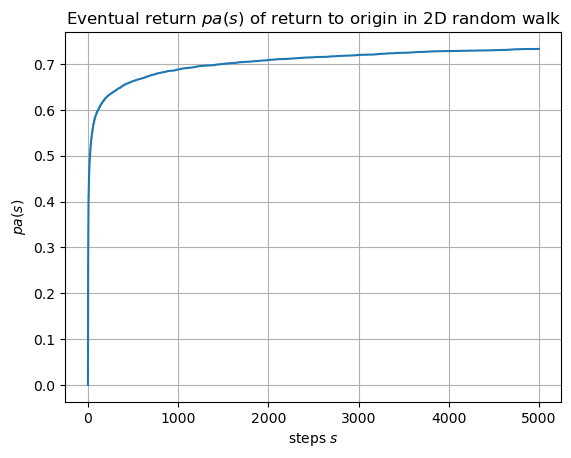

In [4]:
plot_rw_pall('2D')

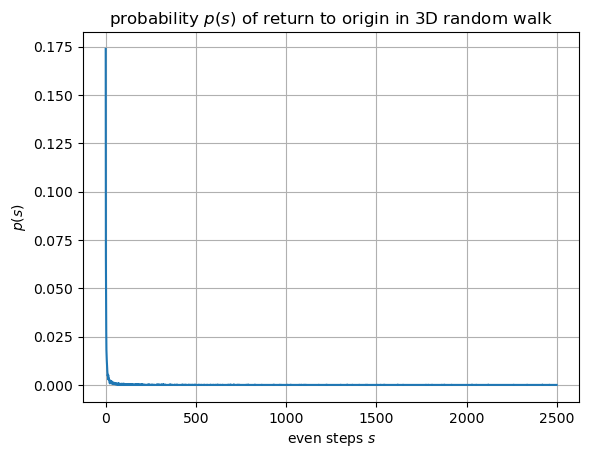

In [5]:
plot_rw_p('3D')

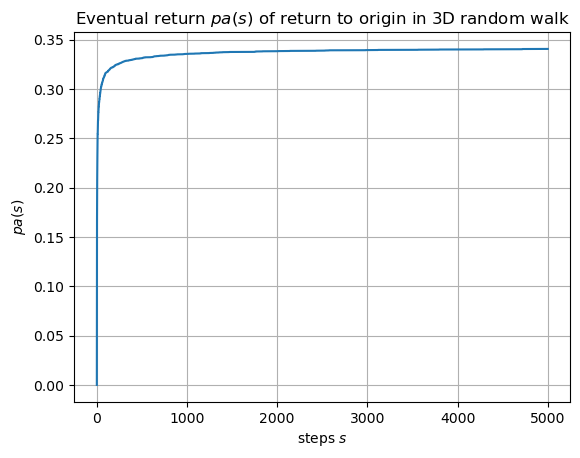

In [6]:
plot_rw_pall('3D')

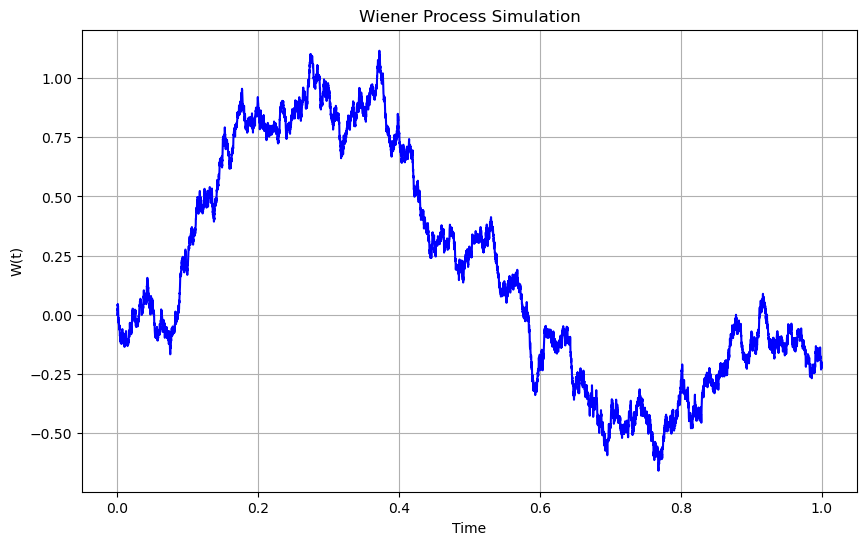

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10000  
T = 1.0          
dt = T / num_steps  
sqrt_dt = np.sqrt(dt)


time_points = np.linspace(0, T, num_steps)
theoretical_mean = np.zeros(num_steps)       
theoretical_variance = time_points         


np.random.seed(42)  
increments = np.random.normal(loc=0, scale=sqrt_dt, size=num_steps - 1)
W = np.zeros(num_steps)  
W[1:] = np.cumsum(increments)


simulated_mean = np.mean(W)
simulated_variance = np.var(W)

plt.figure(figsize=(10, 6))
plt.plot(time_points, W, label="Simulated Wiener Process", color="blue")


plt.title("Wiener Process Simulation")
plt.xlabel("Time")
plt.ylabel("W(t)")

plt.grid()
plt.savefig('wiener_process.pdf', bbox_inches='tight',pad_inches = 0)

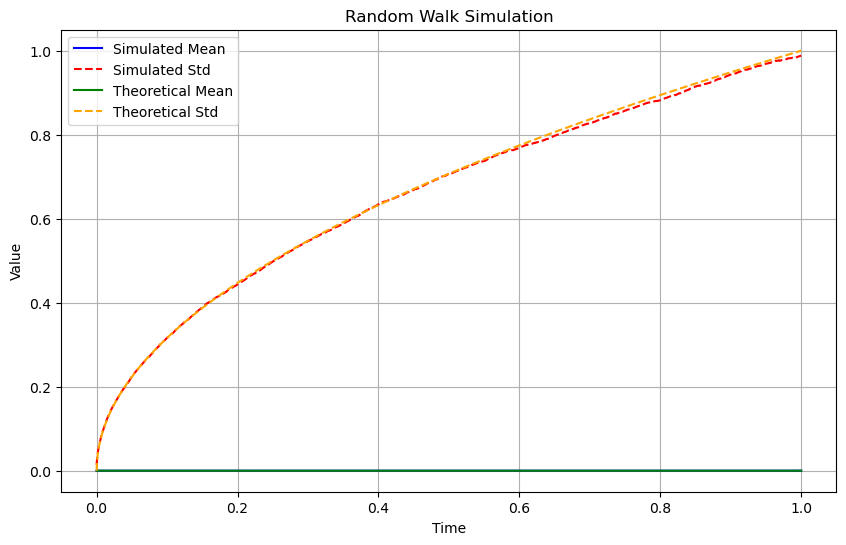

In [8]:
max_s = 5000
N = 10000
num_steps = 5000  
T = 1.0          
dt = T / num_steps  
sqrt_dt = np.sqrt(dt)
time_points = np.linspace(0, T, num_steps)


pos = get_rw_pos('1D', max_s, N)

simulate_mean = np.mean(pos, axis = 0) * dt
simulate_std = np.std(pos, axis = 0) * np.sqrt(dt)
theoretical_mean = np.zeros(num_steps)
theoretical_variance = np.sqrt(time_points)



plt.figure(figsize=(10, 6))
plt.plot(time_points, simulate_mean, label="Simulated Mean", color="blue")
plt.plot(time_points, simulate_std, label="Simulated Std", color="red", linestyle="--")
plt.plot(time_points, theoretical_mean, label="Theoretical Mean", color="green")
plt.plot(time_points, theoretical_variance, label="Theoretical Std", color="orange", linestyle="--")




plt.title("Random Walk Simulation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()

plt.savefig('sim.pdf', bbox_inches='tight', pad_inches = 0)


## Animate

In [9]:
Max_s = 50
Time = 10



class RandomWalk2D(MovingCameraScene):

    def check_bounds(self, pos, camera):
        x, y = pos[0:2]
        frame_center = camera.frame_center
        frame_width = camera.frame_width
        frame_height = camera.frame_height
        x_min = frame_center[0] - frame_width / 2
        x_max = frame_center[0] + frame_width / 2
        y_min = frame_center[1] - frame_height / 2
        y_max = frame_center[1] + frame_height / 2
        return x_min <= x <= x_max and y_min <= y <= y_max

    def construct(self):

        begin_text = Text(
            "Random Walk in 2D with {} steps".format(Max_s), font_size=30, color=WHITE
        )
        self.play(Write(begin_text), run_time=1)
        self.wait(0.5)
        self.play(FadeOut(begin_text))

        numberplane = NumberPlane(
            background_line_style={"stroke_color": TEAL},
            x_range=[-100, 100, 1],
            y_range=[-100, 100, 1],
        )
        dot = Dot(ORIGIN, color=ORANGE)

        self.add(numberplane, dot)
        origin_text = Text("(0,0)", color=WHITE, font_size=20).next_to(
            dot, (DOWN + RIGHT) / 2
        )
        self.add(origin_text)
        pos = ORIGIN
        self.camera.frame.save_state()
        self.camera.frame.set(height=8.2)
        for _ in range(Max_s):

            step = random.choice([UP, DOWN, LEFT, RIGHT])
            next_pos = pos + step

            if not self.check_bounds(next_pos, self.camera):
                self.play(
                    self.camera.frame.animate.set(width=self.camera.frame.width * 1.5),
                    run_time=0.5,
                )

            arrow = Arrow(pos, next_pos, buff=0, color=BLUE)
            self.play(
                GrowArrow(arrow), dot.animate.move_to(next_pos), run_time=Time / Max_s
            )

            pos = next_pos

        self.wait()

%manim -qh -v WARNING RandomWalk2D 

Manim Community v0.18.1

In [11]:
from manim import *
import random

Max_s = 50
Time = 10

class RandomWalk3D(ThreeDScene):
    def check_bounds(self, pos, camera):
        x, y, z = pos[:3]

        center = camera.frame_center
        width = camera.frame_width
        height = camera.frame_height
        x_min = center[0] - width / 2
        x_max = center[0] + width / 2
        y_min = center[1] - height / 2
        y_max = center[1] + height / 2


        return x_min <= x <= x_max and y_min <= y <= y_max 

    def construct(self):
        begin_text = Text(
            "Random Walk in 3D with {} steps".format(Max_s), font_size=30, color=WHITE
        )
        self.play(Write(begin_text), run_time=1)
        self.wait(0.5)
        self.play(FadeOut(begin_text))

        # 3D Axes
        l = 10
        axes = ThreeDAxes(
            x_range=[-l, l, 1],
            y_range=[-l, l, 1],
            z_range=[-l, l, 1],
            x_length=l*2,
            y_length=l*2,
            z_length=l*2,
        )

        x_label = axes.get_x_axis_label(Tex("x"))
        y_label = axes.get_y_axis_label(Tex("y")).shift(UP * 1.8)
 

        # Initial Dot
        dot = Dot3D(ORIGIN, color=ORANGE)

        # Camera settings
        self.set_camera_orientation(zoom=0.5)
        self.play(FadeIn(axes), FadeIn(dot), FadeIn(x_label), FadeIn(y_label))
        self.wait(0.5)
        
        self.move_camera(phi=75 * DEGREES, theta=30 * DEGREES, zoom=1, run_time=1.5)
        
        self.wait(0.5)

        pos = ORIGIN
        for _ in range(Max_s):
            # Random step
            step = random.choice([UP, DOWN, LEFT, RIGHT, IN, OUT])
            next_pos = pos + step

            # Check bounds
            if not self.check_bounds(next_pos, self.camera):
                self.play(
                    self.camera.animate.set_width(self.camera.get_width() * 1.5),
                    run_time=0.5,
                )
            # Arrow and Dot3D movement
            arrow = Arrow(pos, next_pos, buff=0, color=BLUE)
            self.play(
                GrowArrow(arrow), dot.animate.move_to(next_pos), run_time=Time / Max_s
            )
            # Update position
            pos = next_pos

        self.wait()

        
%manim -qh -v WARNING RandomWalk3D

Manim Community v0.18.1